In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pyarabic.araby as araby
from wordcloud import WordCloud, STOPWORDS
from bidi.algorithm import get_display
import arabic_reshaper
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [219]:
MSA=pd.read_csv('MSA_.csv')
QADI=pd.read_csv('./datasets_V0_1_0/QADI_preproV0.1.0.csv')
IADD=pd.read_csv('./datasets_V0_1_0/IADD_preproV0.1.0.csv')
MADAR=pd.read_csv('MADAR.csv')


In [220]:
MADAR

,sent,country
0,هو هنيك، قدام معلومات السياح بالضبط.,SY
1,مالي سمعان من قبل بهالعنوان هون.,SY
2,روح ساوي لبين ما تشوف صيدلية.,SY
3,بشقد الفطور؟,SY
4,شلون بقدر أساعدك؟,SY
...,...,...
135995,في تواليت في المحطة.,TN
135996,خليه طويل.,TN
135997,وفلي المازوت.,TN
135998,نجم ناخو زوز بلايص فاضين لليلة؟,TN


In [221]:
QADI=QADI[QADI['tweet'].isnull()==False]
IADD=IADD[IADD['tweet'].isnull()==False]
MADAR=MADAR[MADAR['sent'].isnull()==False]

In [222]:
def length_text(data):
    try:
        text_length = [ len(text.split()) for text in data['text']]
    except:
        try:     
            text_length = [ len(text.split()) for text in data['tweet']]
        except:
            text_length = [ len(text.split()) for text in data['sent']]
    

    print("Max of text len: ",np.max(text_length))
    print("mean of text len: ",np.mean(text_length))
    import matplotlib.pyplot as plt
    plt.hist(text_length,bins= range(200),density=True)
    plt.show()
     

Max of text len:  90
mean of text len:  81.0928145552892


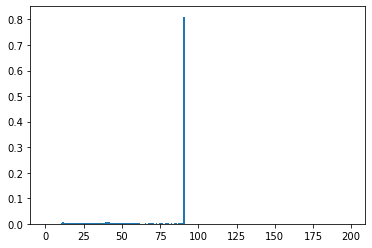

In [223]:
length_text(MSA)

Max of text len:  87
mean of text len:  12.891548504687629


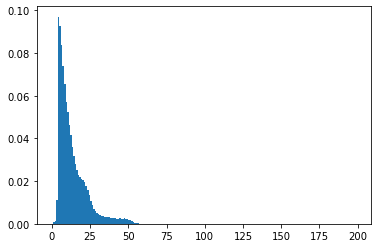

In [224]:
length_text(QADI)

Max of text len:  6386
mean of text len:  11.941761811644485


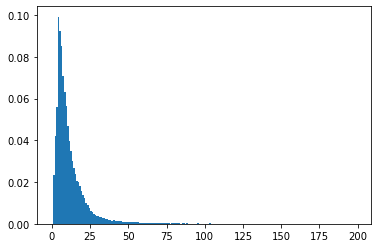

In [225]:
length_text(IADD)

Max of text len:  59
mean of text len:  5.936705357142857


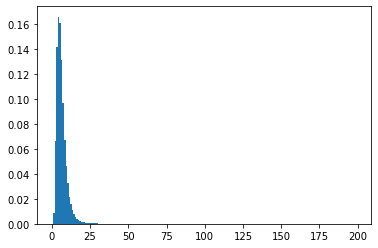

In [226]:
length_text(MADAR)

In [227]:
QADI[QADI['country']=='MA'][:20000]

,tweet,country
273035,احلى شي صوتي انا عارفاه,MA
273036,ولا يحرمني منك يا روحي انتي يديم لي قلبك الطيب,MA
273037,تسابقني خطاي لموعد رجوعك أنا الي غير قلبك ما ع...,MA
273038,منتظر رجعتك رغم الظروف ماسك العهد لو طال البطى...,MA
273039,تستاهل جنون انت الصديق الصدوق مهما سوينا قليل ...,MA
...,...,...
283973,أغرب المنتجات الي مكن تشتريها من أمازون قفاز ث...,MA
283974,ازاي تعرف الحاجه الي انت شغوف بيها,MA
283975,هذا ما عندكم تعلم كذا وتعلم كذا وكأنكم خلقتم م...,MA
283976,غادي نخلص كثر من باش نرجعو اله ياخد الحق فلي ك...,MA


In [228]:
dialects=list(QADI['country'].unique())

In [242]:
IADD.dialect.unique()

array([nan, 'PL', 'JO', 'SY', 'LB', 'DZ', 'MA', 'TN', 'EG', 'IQ'],
      dtype=object)

In [230]:
QADI=QADI.rename(columns={'tweet':'text','country':'dialect'})
IADD=IADD[['tweet','country']].rename(columns={'tweet':'text','country':'dialect'})
MADAR=MADAR.rename(columns={'sent':'text','country':'dialect'})
MSA=MSA[['text','dialect']]

In [231]:
data=pd.DataFrame()
for dialect in dialects:
        data=pd.concat([data,QADI[QADI['dialect']==dialect][:20000]])

In [232]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,15915
EG,20000
IQ,15196
JO,20000
KW,20000
LB,20000
LY,20000


In [233]:
for dialect in dialects:
    temp=data['dialect'][data['dialect']==dialect].count()
    if (temp<20000):
        data=pd.concat([data,MADAR[MADAR['dialect']==dialect][:(20000-temp)]])

In [234]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,17915
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [235]:
for dialect in dialects:
    temp=data['dialect'][data['dialect']==dialect].count()
    if (temp<20000):
        data=pd.concat([data,IADD[IADD['dialect']==dialect][:(20000-temp)]])

In [236]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,20000
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [237]:
#add MSA
data=pd.concat([data,MSA[:10000]])
data=pd.concat([data,MADAR[MADAR['dialect']=="MSA"][:10000]])

In [238]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,20000
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [239]:
data.to_csv("data_v0.1.0.csv",index=False)